##Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Tópico estudado do livro *Learning from data*:


3.   The Linear Model



##1. Classificação Linear
O modelo linear que classifica dados em duas classes tem como espaço de hipóteses os classificadores lineares, em que a hipótese $h$ tem a forma
\begin{align*}
h(𝐱)=\text{sign}(𝐰^T𝐱),
\end{align*}
para algum vetor de pesos $𝐰\in\mathbb{R}^{d+1}$, em que $d$ corresponde à dimensão de $\mathcal{X}$ e à coordenada adicionada $x_0=1$ para o viés $w_0$.

Através do PLA, conseguimos classificar dados corretamente (o que significa que obtemos $E_{in}=0$) em um número finito de iterações, supondo que $\mathcal{D}$ é linearmente separável. Além disso, pela análise da dimensão VC, sabemos que a hipótese aproximadora $g$ generaliza bem fora da amostra.

Para $\mathcal{D}$ não linearmente separável (o que é comum), o PLA nunca termina sua execução. Nesse caso, se quisermos minimizar $E_{in}$, devemos resolver o problema de otimização combinatorial
\begin{align*}
\underset{𝐰\in\mathbb{R}^{d+1}}{\text{min}}\frac{1}{N}\sum_{n=1}^N𝟙_{\{\text{sign}(𝐰^T𝐱_n)\neq y_n\}}.
\end{align*}
Pela natureza discreta de sign(·) e $𝟙_{\{·\}}$ e por análises mais profundas, sabe-se que não há algoritmo eficiente para encontrar esse $E_{in}$ mínimo. O que podemos fazer é aproximar a minimização do erro amostral. Uma modificação simples do PLA, que chamamos de algoritmo ***pocket***, é a de armazenar o melhor $𝐰$ encontrado até a iteração $t$, isto é, um $𝐰$ que dá um $E_{in}$ menor do que aquele avaliado do melhor vetor de pesos anterior.

Não há garantias sobre a sua velocidade de convergência para um erro amostral mínimo aproximado. Mesmo assim, ele é útil por sua simplicidade.

##2. Regressão linear

A regressão linear é um modelo linear que, diferente da classificação linear, lida com $f$ real. O algorimo de regressão linear é baseado na minimização do erro quadrático entre $h(𝐱)$ e $y$:
\begin{align*}
E_{out}(h)=\mathbb{E}\bigl[(h(𝐱)-y)^2\bigr],
\end{align*}
em que o valor esperado é tomado em relação à distribuição de probabilidade conjunta $P(𝐱,y)$. ($f$ pode não ser uma função determinística, mas sim uma função-alvo com ruído. Dessa forma, os valores $y_n$ vêm por uma distribuição $P(y|𝐱)$ e cada par $(𝐱_n,y_n)$ vem, portanto, por uma distribuição $P(𝐱,y)$. Essa é uma forma geral de considerar o problema, já que, se $f$ for determinística, podemos dizer que o ruído sempre é zero e a formalização por distribuições de probabilidade ainda é aplicável.) Por não ser possível computar $E_{out}(h)$ através de $P(𝐱,y)$ desconhecida, consideraremos novamente o formato com o erro amostral,
\begin{align*}
E_{in}(h)=\frac{1}{N}\sum_{n=1}^N(h(𝐱_n)-y_n)^2.
\end{align*}
Nesse problema, $h$ tem a forma
\begin{align*}
h(𝐱)=\sum_{i=0}^dw_ix_i=𝐰^T𝐱,
\end{align*}
onde $𝐱\in\{1\}\times\mathbb{R}^d$ e $𝐰\in\mathbb{R}^{d+1}$. Nesse caso, é util tornar $E_{in}(h)$ representado por matrizes. Seja $X\in\mathbb{R}^{N\times(d+1)}$ a matriz $N\times(d+1)$ em que as linhas são as entradas $𝐱_n$ como vetores linha, e seja $𝒚\in\mathbb{R}^N$ o vetor coluna cujos componentes sejam os valores $y_n$. Dessa forma,
\begin{align*}
E_{in}(𝐰)&=\frac{1}{N}\sum_{n=1}^N(𝐰^T𝐱_n-y_n)^2\\
&=\frac{1}{N}||X𝐰-𝒚||^2\\
&=\frac{1}{N}(𝐰^TX^TX𝐰-2𝐰^TX^T𝒚+𝒚^T𝒚),
\end{align*}
onde $||·||$ representa a norma Euclidiana de um vetor. O algorimo da regressão linear é derivado através da minimização de $E_{in}(𝐰)$ sobre todos os possíveis $𝐰\in\mathbb{R}^{d+1}$, como em
\begin{align*}
  𝐰_{\text{lin}}=\underset{𝐰\in\mathbb{R}^{d+1}}{\text{argmin}}E_{in}(𝐰).
\end{align*}
Por $E_{in}(𝐰)$ ser diferenciável, podemos encontrar $𝐰$ que minimiza $E_{in}(𝐰)$ através da equação $\nabla E_{in}(𝐰)=\mathbf{0}$ (o gradiente é um vetor coluna cujo $i$-ésimo elemento é $[\nabla E_{in}(𝐰)]_i=\frac{\delta}{\delta w_i}E_{in}(𝐰)$). Assim,
\begin{align*}
\nabla E_{in}(𝐰)&=\frac{2}{N}(X^TX𝐰-X^T𝒚)=\mathbf{0}\\
&\rightarrow X^TX𝐰=X^T𝒚\\
&\rightarrow 𝐰=X^{\dagger}𝒚,
\end{align*}
onde $X^{\dagger}=(X^TX)^{-1}X^T$, denominada pseudo-inversa da matriz $X$. O $𝐰$ obtido é a única solução ótima da equação quando $X^TX$ é invertível. Se não for invertível, a pseudo-inversa ainda pode ser definida, mas a solução $𝐰$ não será única. Na realidade, a matriz será invertível quase sempre, já que $N$ costuma ser muito maior do que $d+1$, o que implica numa alta probabilidade para $d+1$ vetores linearmente independentes $𝐱_n$ estarem em $X$.

O algoritmo de regressão linear está implementado abaixo:


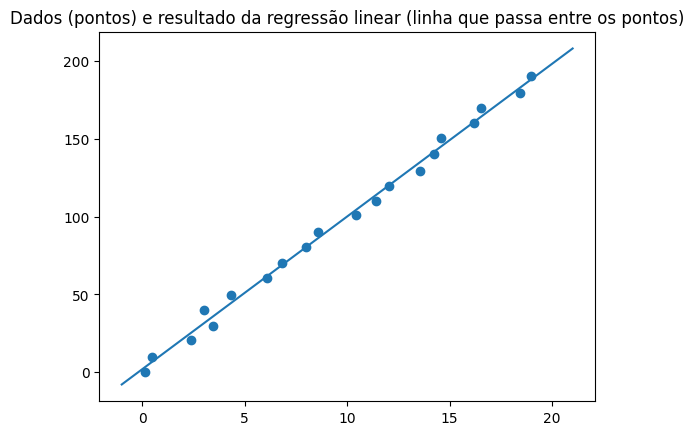

In [107]:
rng = np.random.default_rng(42)
x = np.array([[i+rng.normal(0, 0.5)] for i in range(20)])
y = np.array([[i*10+rng.normal(0, 0.5)] for i in range(20)])

def reg_lin(x, y, N):
  X = np.hstack((np.ones((N, 1)), x))
  X_transp = np.transpose(X)
  inv = np.linalg.inv(np.matmul(X_transp, X))
  X_dagger = np.matmul(inv, X_transp)

  return np.matmul(X_dagger, y)

w_0, w_1 = reg_lin(x, y, 20)

plt.title("Dados (pontos) e resultado da regressão linear (linha que passa entre os pontos)")
plt.scatter(list(x), list(y))
plt.plot(np.linspace(-1, 21), w_1*np.linspace(-1, 21)+w_0)


##3. Regressão logística
###3.1. Preparação do problema
Iremos agora lidar com a regressão logística, que trabalha com $f$ representando uma probabilidade. Essa probabilidade deve pertencer ao intervalo $[0,1]$ e, por causa disso, utilizamos o seguinte modelo:
\begin{align*}
h(𝐱)=\theta(𝐰^T𝐱)=\frac{e^{𝐰^T𝐱}}{1+e^{𝐰^T𝐱}},
\end{align*}
que devolve um valor entre $0$ e $1$. A função $\theta$ é chamada de sigmoide e pode ser interpretada como a probabilidade de um evento ocorrer dadas as informações $𝐱$ da instância analisada e os pesos $𝐰$ correspondentes de cada informação.

Para esse problema, estamos tentando aprender a função-alvo $f(𝐱)=\mathbb{P}[y=+1|𝐱]$. Note que $P(y|𝐱)=f(𝐱)$ para $y=+1$ e $P(y|𝐱)=1-f(𝐱)$ para $y=-1$. Para determinarmos uma medida de erro como ferramenta desse aprendizado, usaremos o conceito de verossimilhança, que é a plausibilidade de que teríamos $y$ através de $𝐱$ se o alvo $P(y|𝐱)$ fosse capturado por nossa hipótese $h(𝐱)$ de fato. Pelas observações anteriores, a verossimilhança pode ser definida como $P(y|𝐱)=h(𝐱)$ para $y=+1$ e $P(y|𝐱)=1-h(𝐱)$ para $y=-1$.

É possível usar a propriedade $1-\theta(s)=\theta(-s)$ para conseguir
\begin{align*}
P(y|𝐱)=\theta(y𝐰^T𝐱).
\end{align*}
Já que $\mathcal{D}$ é gerado de forma independente, a probabilidade de conseguirmos cada $y_n$ através dos $𝐱_n$ seria $\prod_{n=1}^NP(y_n|𝐱_n)$. Se utilizássemos
\begin{align*}
-\frac{1}{N}\ln\biggl(\prod_{n=1}^NP(y_n|𝐱_n)\biggr)=\frac{1}{N}\sum_{n=1}^N\ln\biggl(\frac{1}{P(y_n|𝐱_n)}\biggr),
\end{align*}
conseguiríamos realizar uma minimização (já que $-\frac{1}{N}\ln(⋅)$ é monotonicamente decrescente), que seria equivalente a maximizar o produto original. Por ser possível realizar uma minimização, conseguimos utilizar a expressão acima como medida de erro em relação a $𝐰$, de modo que
\begin{align*}
E_{in}(𝐰)=\frac{1}{N}\sum_{n=1}^N\ln\biggl(\frac{1}{\theta(y_n𝐰^T𝐱_n)}\biggr)=\frac{1}{N}\sum_{n=1}^N\ln(1+e^{-y_n𝐰^T𝐱_n}).
\end{align*}
Sabendo que $\nabla E_{in}(𝐰)=-\frac{1}{N}\sum_{n=1}^{N}\frac{y_n𝐱_n}{1+e^{y_n𝐰^T𝐱_n}}$, para aprender com dados em regressão logística, também deve-se ter $\nabla E_{in}(𝐰)=\mathbf{0}$, mas esse gradiente é difícil de usar, então não consideraremos uma solução analítica como no caso da regressão linear. Mesmo assim, é possível obter esse resultado esperado através do algoritmo de gradiente descendente.

###3.2. Gradiente descendente
A função $E_{in}(𝐰)$ é minimizável em relação a $𝐰$ e gostaríamos de realizar esse processo através de passos $𝐰(t)$, $t=0,1,\dots$, em direção à descida mais íngreme para obter um mínimo. Nesse sentido, suponha que tomamos um pequeno passo de tamanho $\eta$ em direção de $\hat{𝐯}$. Os novos pesos são $𝐰(0)+\eta\hat{𝐯}$, e já que $\eta$ é pequeno, podemos utilizar a expansão de Taylor de primeira ordem para obtermos
\begin{align*}
\Delta E_{in}&=E_{in}(𝐰(0)+\eta\hat{𝐯})-E_{in}(𝐰(0))\\
&=\eta\nabla E_{in}(𝐰(0))^T\hat{𝐯}+O(\eta^2)\\
&\geq -\eta||\nabla E_{in}(𝐰(0))||.
\end{align*}
Considerando o último termo como aproximação, a igualdade é verificada se e somente se
\begin{align*}
\hat{𝐯}=-\frac{\nabla E_{in}(𝐰(0))}{||\nabla E_{in}(𝐰(0))||}.
\end{align*}
A direção determinada por $\hat{𝐯}$ é a direção de descida mais íngreme para a função $E_{in}$, considerando o tamanho de passo $\eta$.

O algoritmo da regressão logística está implementado abaixo:

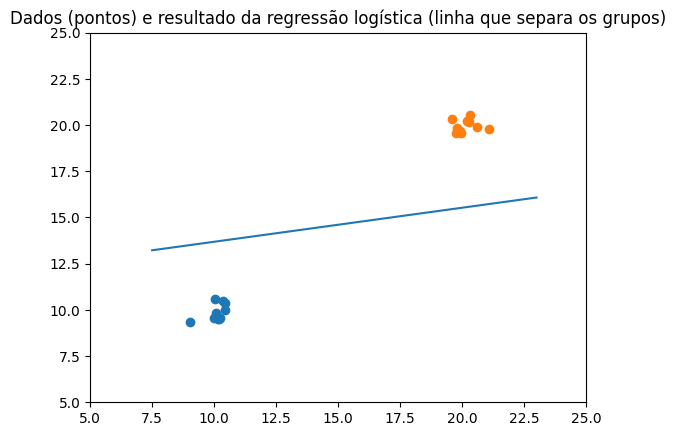

In [109]:
rng = np.random.default_rng(42)
x_0 = np.array([[rng.normal(10, 0.5), rng.normal(10, 0.5)] for _ in range(10)])
x_1 = np.array([[rng.normal(20, 0.5), rng.normal(20, 0.5)] for _ in range(10)])
y_0 = np.array([[-1] for _ in range(10)])
y_1 = np.array([[1] for _ in range(10)])
x = np.append(x_0, x_1, axis=0)
y = np.append(y_0, y_1, axis=0)

def gradient(X, y, w, N):
  w = w.reshape(3, 1)   # w vem com dimensões (3, ), e devemos ter dimensões (3, 1) para a multiplicação
  return - np.mean((y * X) / (1 + np.exp(np.matmul((y * X), w))), axis=0)

def reg_log(x, y, N, eta=0.1, iterations=5000):
  X = np.hstack((np.ones((N, 1)), x))
  w = rng.normal(0, 1, 3)

  for _ in range(iterations):
    grad = gradient(X, y, w, N)
    w -= eta * grad

  return w

w = reg_log(x, y, 20)

plt.title("Dados (pontos) e resultado da regressão logística (linha que separa os grupos)")
plt.xlim(5, 25)
plt.ylim(5, 25)
plt.plot(np.linspace(7.5, 23), - (w[0] + w[1] * np.linspace(7.5, 23)) / w[2])
plt.scatter(list(x_0[:, 0]), list(x_0[:, 1]))
plt.scatter(list(x_1[:, 0]), list(x_1[:, 1]))